# <center style="color: red; font-size: 50px;">✪ Gaming Industry History ✪ </center>
    

> <center><img src="https://giffiles.alphacoders.com/217/217181.gif"></center>

# I) Introduction
​
><i> The objective of analyzing the gaming industry is to gain a comprehensive understanding of its current state, trends, challenges, and opportunities. This analysis will encompass various aspects, including market size, key players, technological advancements, consumer behavior, regulatory landscape, and potential future developments. By conducting a thorough analysis, I aim to identify the driving forces shaping the industry, assess potential risks, and uncover potential areas for growth and innovation. The insights derived from this analysis will help stakeholders make informed decisions, devise effective strategies, and stay competitive in the dynamic and ever-evolving gaming market..</i>
​

# Table of content

<div class="alert alert-block alert-info" style="margin-top: 20px">

1.  [Libraries and importing data](#0)<br>
2.  [Data preparation](#1)<br>
3.  [Data Inspection](#2) <br>
4.  [Data Visualization](#3) <br>
5.  [Choropleth Map](#4) <br>
    </div>


# II) Libaries and data loading<a id="0"></a>

 <u>1) Import packages<u>

In [29]:
#data processing packages
import numpy as np
import pandas as pd
import json
import math
import datetime
from scipy import stats


#visualization packages
import matplotlib.pyplot as plt
import seaborn as sns
import folium
import plotly.express as px
import plotly.graph_objects as go
from plotly.offline import init_notebook_mode,iplot
import plotly.subplots as sp
%matplotlib inline


#import web-design packages
from jupyter_dash import JupyterDash
from dash import Dash, dcc, html, dash_table
import dash_bootstrap_components as dbc
from dash.dependencies import Output, Input
from dash.exceptions import PreventUpdate
from dash_bootstrap_templates import load_figure_template


#machine learning packages



#others
from PIL import Image

 <u>2) Import packages<u>

In [30]:
#read the full data
vgsales=pd.read_csv("vgsales.csv")
vgsales.head()

Rank                      Name Platform    Year         Genre Publisher  \
0     1                Wii Sports      Wii  2006.0        Sports  Nintendo   
1     2         Super Mario Bros.      NES  1985.0      Platform  Nintendo   
2     3            Mario Kart Wii      Wii  2008.0        Racing  Nintendo   
3     4         Wii Sports Resort      Wii  2009.0        Sports  Nintendo   
4     5  Pokemon Red/Pokemon Blue       GB  1996.0  Role-Playing  Nintendo   

   NA_Sales  EU_Sales  JP_Sales  Other_Sales  Global_Sales  
0     41.49     29.02      3.77         8.46         82.74  
1     29.08      3.58      6.81         0.77         40.24  
2     15.85     12.88      3.79         3.31         35.82  
3     15.75     11.01      3.28         2.96         33.00  
4     11.27      8.89     10.22         1.00         31.37

**Dataset Summary:**

   * <b><i>Rank</i></b> - Ranking of overall sales, integer
   
   * <b><i>Name</i></b> - The games name

   * <b><i>Platform</i></b> - Platform of the games release (i.e. PC,PS4, etc.), object

   * <b><i>Year</i></b> - Year of the game's release, float

   * <b><i>Genre</i></b> - Genre of the game ,object

   * <b><i>Publisher</i></b> - Publisher of the game, object

   * <b><i>NA_Sales</i></b> - Sales in North America (in millions), float

   * <b><i>EU_Sales</i></b> - Sales in Europe (in millions), float

   * <b><i>JP_Sales</i></b> - Sales in Japan (in millions), float

   * <b><i>Other_Sales</i></b> - Sales in the rest of the world (in millions), float

   * <b><i>Global_Sales</i></b> - Total worldwide sales, float



# III) DATA PREPARATION <a id="1"></a>

In [31]:
#df_shape
vgsales.shape

(16598, 11)

In [32]:
vgsales.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 16598 entries, 0 to 16597
Data columns (total 11 columns):
 #   Column        Non-Null Count  Dtype  
---  ------        --------------  -----  
 0   Rank          16598 non-null  int64  
 1   Name          16598 non-null  object 
 2   Platform      16598 non-null  object 
 3   Year          16327 non-null  float64
 4   Genre         16598 non-null  object 
 5   Publisher     16540 non-null  object 
 6   NA_Sales      16598 non-null  float64
 7   EU_Sales      16598 non-null  float64
 8   JP_Sales      16598 non-null  float64
 9   Other_Sales   16598 non-null  float64
 10  Global_Sales  16598 non-null  float64
dtypes: float64(6), int64(1), object(4)
memory usage: 1.4+ MB


In [33]:
vgsales.isnull().sum()

Rank              0
Name              0
Platform          0
Year            271
Genre             0
Publisher        58
NA_Sales          0
EU_Sales          0
JP_Sales          0
Other_Sales       0
Global_Sales      0
dtype: int64

Replacing null values is a crucial step in data preprocessing to ensure accurate and consistent analysis. There are various common ways to handle null values, but the choice depends on the specific characteristics of our data. For null values in Publisher column we will replace it with "Others" - others publishers but for Year column we will replace it with the mean year.

In [34]:
#replacing null values in publisher columns
vgsales['Publisher'].fillna("Others", inplace=True)

#check whether the method works
vgsales[vgsales['Publisher'].isnull()]

Empty DataFrame
Columns: [Rank, Name, Platform, Year, Genre, Publisher, NA_Sales, EU_Sales, JP_Sales, Other_Sales, Global_Sales]
Index: []

In [35]:
#calculate the year mean
year_mean = vgsales['Year'].mean()

#replace null values
vgsales['Year'].fillna(year_mean, inplace=True)

#check whether the method works
vgsales[vgsales['Year'].isnull()]

Empty DataFrame
Columns: [Rank, Name, Platform, Year, Genre, Publisher, NA_Sales, EU_Sales, JP_Sales, Other_Sales, Global_Sales]
Index: []

In [36]:
#check duplicates
vgsales.duplicated().sum()

0

In [37]:
#check dtypes
vgsales.dtypes

Rank              int64
Name             object
Platform         object
Year            float64
Genre            object
Publisher        object
NA_Sales        float64
EU_Sales        float64
JP_Sales        float64
Other_Sales     float64
Global_Sales    float64
dtype: object

# iv) Data Inspection<a id="2"></a>

Let's inspecting these questions:
- Determine the first/last year the dataset started.
- How many unique values does each columns have and how it represented.
- Determine total global sales and total sales by regions.

Observe the duplicate values in the name columns
- Identify why it is being duplicated
- List out all the platforms and publishers

In [38]:
#unique value in each rows
vgsales.nunique()

Rank            16598
Name            11493
Platform           31
Year               40
Genre              12
Publisher         579
NA_Sales          409
EU_Sales          305
JP_Sales          244
Other_Sales       157
Global_Sales      623
dtype: int64

From the chart above, we can see that the dataset has 11 000 thousand games, across 31 platforms, published by 578 publishers through 40 years total.

In [39]:
vgsales.describe()

Rank          Year      NA_Sales      EU_Sales      JP_Sales  \
count  16598.000000  16598.000000  16598.000000  16598.000000  16598.000000   
mean    8300.605254   2006.406443      0.264667      0.146652      0.077782   
std     4791.853933      5.781197      0.816683      0.505351      0.309291   
min        1.000000   1980.000000      0.000000      0.000000      0.000000   
25%     4151.250000   2003.000000      0.000000      0.000000      0.000000   
50%     8300.500000   2007.000000      0.080000      0.020000      0.000000   
75%    12449.750000   2010.000000      0.240000      0.110000      0.040000   
max    16600.000000   2020.000000     41.490000     29.020000     10.220000   

        Other_Sales  Global_Sales  
count  16598.000000  16598.000000  
mean       0.048063      0.537441  
std        0.188588      1.555028  
min        0.000000      0.010000  
25%        0.000000      0.060000  
50%        0.010000      0.170000  
75%        0.040000      0.470000  
max       10.570000     82.740000

Based on the summary statistics provided above, let's analyze the dataset and draw some insights:

1. Time Period: The dataset spans from the year 1980 to 2020, with the majority of the games released between 2003 and 2010, as indicated by the 25th and 75th percentiles.

2. Global Sales: The mean global sales value is approximately 0.54 million, with a standard deviation of 1.56 million. The minimum recorded global sales figure is 0.01 million units, while the maximum is 82.74 million. This indicates that the dataset includes games with varying degrees of popularity, from very low sales to highly successful ones.

3. Regional Sales: On average, the sales in North America (NA_Sales) are higher than in Europe (EU_Sales) and Japan (JP_Sales). The mean sales values for NA, EU, and JP are approximately 0.26 million, 0.15 million, and 0.08 millions, respectively. This suggests that the North American market is generally more significant in terms of sales volume compared to Europe and Japan.

4. Other Sales: Sales in other regions (Other_Sales) are relatively lower compared to the main regions (NA, EU, and JP). The mean other sales value is approximately 0.05 million units.

5. Yearly Trends: By examining the years of game releases, it's possible to observe any trends or shifts in the gaming industry over time. For example, it would be interesting to see how sales figures have evolved with the advancement of technology and the popularity of different gaming platforms.

6. Outliers: The presence of outliers can significantly affect the overall statistics. The high maximum values for global sales (82.74 million) and regional sales could be indicative of some highly successful blockbuster games or potential data quality issues that may require further investigation.

In [40]:
NA_Sales = vgsales['NA_Sales'].sum()
EU_Sales = vgsales['EU_Sales'].sum()
JP_Sales = vgsales['JP_Sales'].sum()
Other_Sales = vgsales['Other_Sales'].sum()
Glob_Sales = vgsales['Global_Sales'].sum()

print('Total NA market revenue is:', round(NA_Sales,2), "million $")
print('Total EU market revenue is:', round(EU_Sales,2), "milion $")
print('Total JP market revenue is:', round(JP_Sales,2), "million $")
print('Total Other market revenue is:', round(Other_Sales,2), "million $")
print('Total Global market revenue is:', round(Glob_Sales,2), "million $")

Total NA market revenue is: 4392.95 million $
Total EU market revenue is: 2434.13 milion $
Total JP market revenue is: 1291.02 million $
Total Other market revenue is: 797.75 million $
Total Global market revenue is: 8920.44 million $


In [41]:
fig = px.imshow(vgsales.corr())
fig.show()

In [42]:
vgsales.Platform.unique()

array(['Wii', 'NES', 'GB', 'DS', 'X360', 'PS3', 'PS2', 'SNES', 'GBA',
       '3DS', 'PS4', 'N64', 'PS', 'XB', 'PC', '2600', 'PSP', 'XOne', 'GC',
       'WiiU', 'GEN', 'DC', 'PSV', 'SAT', 'SCD', 'WS', 'NG', 'TG16',
       '3DO', 'GG', 'PCFX'], dtype=object)

In [43]:
vgsales.Publisher.unique()

array(['Nintendo', 'Microsoft Game Studios', 'Take-Two Interactive',
       'Sony Computer Entertainment', 'Activision', 'Ubisoft',
       'Bethesda Softworks', 'Electronic Arts', 'Sega', 'SquareSoft',
       'Atari', '505 Games', 'Capcom', 'GT Interactive',
       'Konami Digital Entertainment',
       'Sony Computer Entertainment Europe', 'Square Enix', 'LucasArts',
       'Virgin Interactive', 'Warner Bros. Interactive Entertainment',
       'Universal Interactive', 'Eidos Interactive', 'RedOctane',
       'Vivendi Games', 'Enix Corporation', 'Namco Bandai Games',
       'Palcom', 'Hasbro Interactive', 'THQ', 'Fox Interactive',
       'Acclaim Entertainment', 'MTV Games', 'Disney Interactive Studios',
       'Others', 'Majesco Entertainment', 'Codemasters', 'Red Orb',
       'Level 5', 'Arena Entertainment', 'Midway Games', 'JVC',
       'Deep Silver', '989 Studios', 'NCSoft', 'UEP Systems',
       'Parker Bros.', 'Maxis', 'Imagic', 'Tecmo Koei', 'Valve Software',
       'ASCII Ente

# VI) Data Visualization

In [44]:
#games by year
games_by_year = vgsales['Year'].groupby(vgsales['Year']).count()

#area chart
fig = px.area(games_by_year, x=games_by_year.index, y=games_by_year,
              labels={
                  "index": "Year",
                  "y": "Number of Games"
              }
              )

#add points
max_year = games_by_year.sort_values(ascending=False).head(1)
fig.add_scatter(x = max_year.index, y = max_year,
                name = r"{} : {}.".format(int(max_year.index.values[0]), max_year.values[0]))

#layout
fig.update_layout(title_text='Number of Games Published Annually', title_x=0.5)

#display
fig.show()

# Sales performance:

{'bodies': [<matplotlib.collections.PolyCollection at 0x1955937a970>],
 'cmaxes': <matplotlib.collections.LineCollection at 0x1955937a8e0>,
 'cmins': <matplotlib.collections.LineCollection at 0x1955938e040>,
 'cbars': <matplotlib.collections.LineCollection at 0x1955938e430>}

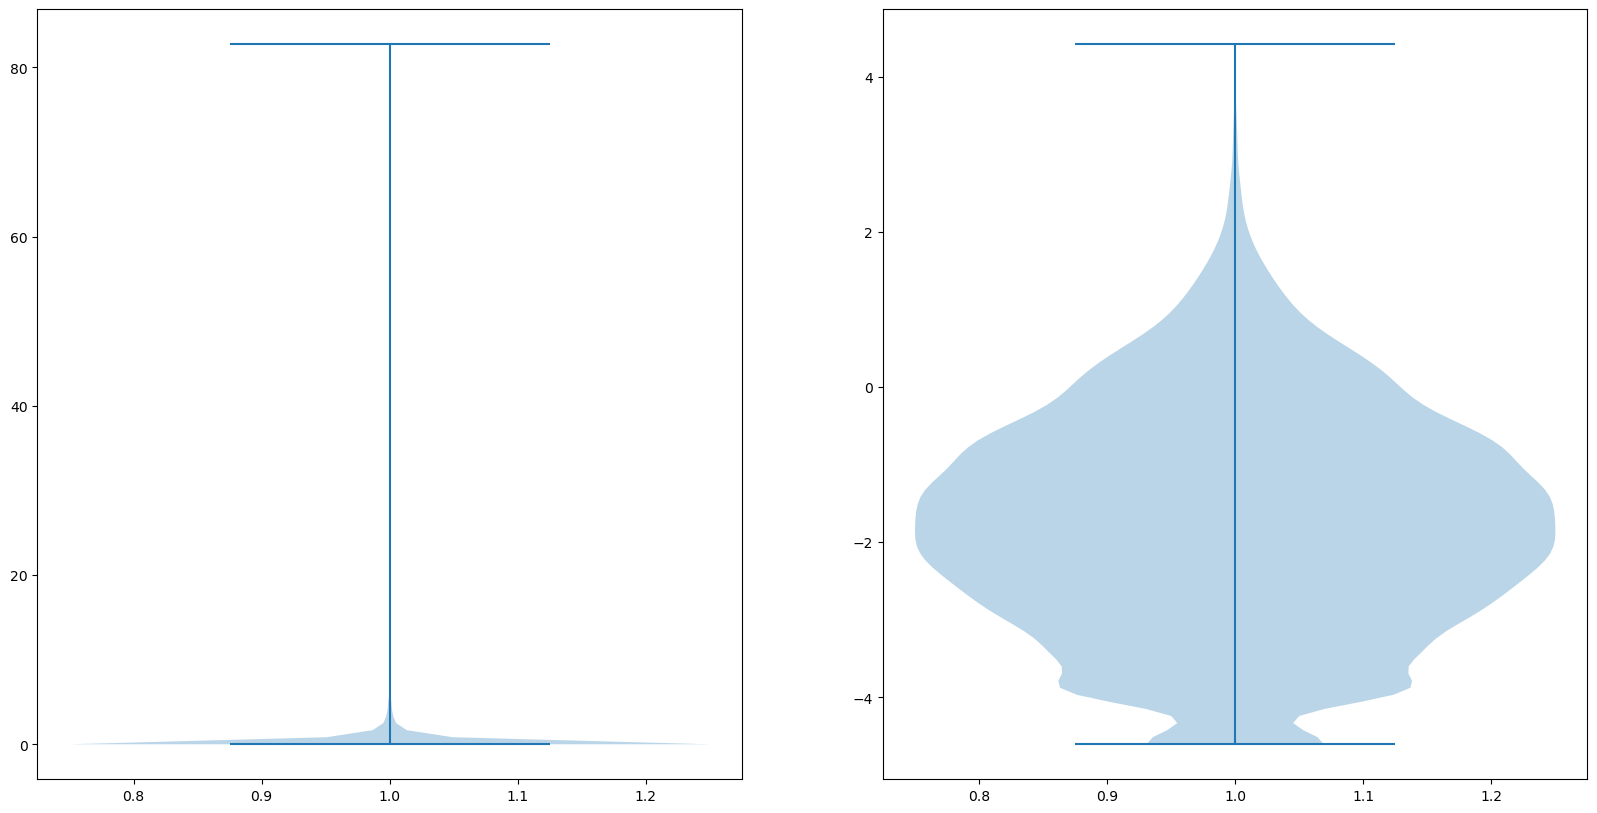

In [45]:
#visualization
fig, ax = plt.subplots(1,2, figsize = (20,10))

ax[0].violinplot(vgsales['Global_Sales'])

#log transformation
vgsales['Global_Sales_log'] = vgsales['Global_Sales'].apply(lambda x: math.log(x))
ax[1].violinplot(vgsales['Global_Sales_log'])

From the chart above (on the left), we can see that the sales frequency distribution is skewed, with a peak on the left and a long tail on the right. It deviates from the normal distribution and tends to be positive. Hence, we would use log transformation to adjust the data (on the right).

The log transformation is often used to reduce skewness of a measurement variable. If, after transformation, the distribution is symmetric, then the Welch t-test might be used to compare groups. If, also, the distribution becomes close to normal, then a reference interval might be determined.

In [46]:
#log transformation
vgsales['Global_Sales'].replace(0, 0.001, inplace=True)
vgsales['Global_Sales_log'] = vgsales['Global_Sales'].apply(lambda x: math.log(x))

vgsales['NA_Sales'].replace(0, 0.001, inplace=True)
vgsales['NA_Sales_log'] = vgsales['NA_Sales'].apply(lambda x: math.log(x))

vgsales['EU_Sales'].replace(0, 0.001, inplace=True)
vgsales['EU_Sales_log'] = vgsales['EU_Sales'].apply(lambda x: math.log(x))

vgsales['JP_Sales'].replace(0, 0.001, inplace=True)
vgsales['JP_Sales_log'] = vgsales['JP_Sales'].apply(lambda x: math.log(x))

vgsales['Other_Sales'].replace(0, 0.001, inplace=True)
vgsales['Other_Sales_log'] = vgsales['Other_Sales'].apply(lambda x: math.log(x))

#visualization
fig = go.Figure()

for col in vgsales[['Global_Sales_log', 'NA_Sales_log','EU_Sales_log', 'JP_Sales_log', 'Other_Sales_log']]:
    fig.add_trace(go.Box(y=vgsales[col].values, name= col))

#display
fig.show()

# Platform performance:

In [47]:
#split up data so plotly can handle without unecessary loop
xaction=vgsales[vgsales.Genre=="Action"]
xsports=vgsales[vgsales.Genre=="Sports"]
xmisc=vgsales[vgsales.Genre=="Misc"]
xrole=vgsales[vgsales.Genre=="Role-Playing"]
xshooter=vgsales[vgsales.Genre=="Shooter"]
xadventure=vgsales[vgsales.Genre=="Adventure"]
xrace=vgsales[vgsales.Genre=="Racing"]
xplatform=vgsales[vgsales.Genre=="Platform"]
xsimulation=vgsales[vgsales.Genre=="Simulation"]
xfight=vgsales[vgsales.Genre=="Fighting"]
xstrategy=vgsales[vgsales.Genre=="Strategy"]
xpuzzle=vgsales[vgsales.Genre=="Puzzle"]

In [48]:
#traces
trace1 = go.Histogram(
    x=xaction.Platform,
    opacity=0.75,
    name = "Action",
    marker=dict(color='rgb(165,0,38)'))
trace2 = go.Histogram(
    x=xsports.Platform,
    opacity=0.75,
    name = "Sports",
    marker=dict(color='rgb(215,48,39)'))
trace3 = go.Histogram(
    x=xmisc.Platform,
    opacity=0.75,
    name = "Misc",
    marker=dict(color='rgb(244,109,67)'))
trace4 = go.Histogram(
    x=xrole.Platform,
    opacity=0.75,
    name = "Role Playing",
    marker=dict(color='rgb(253,174,97)'))
trace5 = go.Histogram(
    x=xshooter.Platform,
    opacity=0.75,
    name = "Shooter",
    marker=dict(color='rgb(254,224,144)'))
trace6 = go.Histogram(
    x=xadventure.Platform,
    opacity=0.75,
    name = "Adventure",
    marker=dict(color='rgb(170,253,87)'))
trace7 = go.Histogram(
    x=xrace.Platform,
    opacity=0.75,
    name = "Racing",
    marker=dict(color='rgb(171,217,233)'))
trace8 = go.Histogram(
    x=xplatform.Platform,
    opacity=0.75,
    name = "Platform",
    marker=dict(color='rgb(116,173,209)'))
trace9 = go.Histogram(
    x=xsimulation.Platform,
    opacity=0.75,
    name = "Simulation",
    marker=dict(color='rgb(69,117,180)'))
trace10 = go.Histogram(
    x=xfight.Platform,
    opacity=0.75,
    name = "Fighting",
    marker=dict(color='rgb(49,54,149)'))
trace11 = go.Histogram(
    x=xstrategy.Platform,
    opacity=0.75,
    name = "Strategy",
    marker=dict(color="rgb(10,77,131)"))
trace12 = go.Histogram(
    x=xpuzzle.Platform,
    opacity=0.75,
    name = "Puzzle",
    marker=dict(color='rgb(1,15,139)'))

#concat
data = [trace1, trace2,trace3,trace4,trace5,trace6,trace7,trace8,trace9,trace10,trace11,trace12]

#layout
layout = go.Layout(barmode='stack',
                   title='Genre Counts According to Platform',
                   xaxis=dict(title='Platform'),
                   yaxis=dict( title='Count'),
                   paper_bgcolor='beige',
                   plot_bgcolor='beige'
)

#display
fig = go.Figure(data=data, layout=layout)
iplot(fig)

In [49]:
#traces
trace1 = go.Bar(
    x=xaction.groupby("Platform")["Global_Sales"].sum().index,
    y=xaction.groupby("Platform")["Global_Sales"].sum().values,
    opacity=0.75,
    name = "Action",
    marker=dict(color="rgb(119,172,238)"))
trace2 = go.Bar(
    x=xsports.groupby("Platform")["Global_Sales"].sum().index,
    y=xsports.groupby("Platform")["Global_Sales"].sum().values,
    opacity=0.75,
    name = "Sports",
    marker=dict(color='rgb(21,90,174)'))
trace3 = go.Bar(
    x=xrace.groupby("Platform")["Global_Sales"].sum().index,
    y=xrace.groupby("Platform")["Global_Sales"].sum().values,
    opacity=0.75,
    name = "Racing",
    marker=dict(color="rgb(156,245,163)"))
trace4 = go.Bar(
    x=xshooter.groupby("Platform")["Global_Sales"].sum().index,
    y=xshooter.groupby("Platform")["Global_Sales"].sum().values,
    opacity=0.75,
    name = "Shooter",
    marker=dict(color="rgb(14,135,23)"))
trace5 = go.Bar(
    x=xmisc.groupby("Platform")["Global_Sales"].sum().index,
    y=xmisc.groupby("Platform")["Global_Sales"].sum().values,
    opacity=0.75,
    name = "Misc",
    marker=dict(color='rgb(252,118,103)'))
trace6 = go.Bar(
    x=xrole.groupby("Platform")["Global_Sales"].sum().index,
    y=xrole.groupby("Platform")["Global_Sales"].sum().values,
    opacity=0.75,
    name = "Role Playing",
    marker=dict(color="rgb(226,28,5)"))
trace7 = go.Bar(
    x=xfight.groupby("Platform")["Global_Sales"].sum().index,
    y=xfight.groupby("Platform")["Global_Sales"].sum().values,
    opacity=0.75,
    name = "Fighting",
    marker=dict(color="rgb(247,173,13)"))
trace8 = go.Bar(
    x=xplatform.groupby("Platform")["Global_Sales"].sum().index,
    y=xplatform.groupby("Platform")["Global_Sales"].sum().values,
    opacity=0.75,
    name = "Platform",
    marker=dict(color="rgb(242,122,13)"))
trace9 = go.Bar(
    x=xsimulation.groupby("Platform")["Global_Sales"].sum().index,
    y=xsimulation.groupby("Platform")["Global_Sales"].sum().values,
    opacity=0.75,
    name = "Simulation",
    marker=dict(color="rgb(188,145,202)"))
trace10 = go.Bar(
    x=xadventure.groupby("Platform")["Global_Sales"].sum().index,
    y=xadventure.groupby("Platform")["Global_Sales"].sum().values,
    opacity=0.75,
    name = "Adventure",
    marker=dict(color='rgb(104,57,119)'))
trace11 = go.Bar(
    x=xstrategy.groupby("Platform")["Global_Sales"].sum().index,
    y=xstrategy.groupby("Platform")["Global_Sales"].sum().values,
    opacity=0.75,
    name = "Strategy",
    marker=dict(color='rgb(245,253,104)'))
trace12 = go.Bar(
    x=xpuzzle.groupby("Platform")["Global_Sales"].sum().index,
    y=xpuzzle.groupby("Platform")["Global_Sales"].sum().values,
    opacity=0.75,
    name = "Puzzle",
    marker=dict(color='rgb(138,72,40)'))

#coacat
data = [trace1, trace2,trace3,trace4,trace5,trace6,trace7,trace8,trace9,trace10,trace11,trace12]

#layout
layout = go.Layout(barmode='stack',
                   title='Total Global Sales According to Platform and Genre',
                   xaxis=dict(title='Platform'),
                   yaxis=dict( title='Global Sales(In Millions)'),
                   paper_bgcolor='beige',
                   plot_bgcolor='beige'
)

#display
fig = go.Figure(data=data, layout=layout)
iplot(fig)

# TOP 10 BIGGEST PUBLISHER

In [50]:
#int vars
summed_pub = vgsales.groupby(by="Publisher").agg({'Name':'count', 'Global_Sales':'sum'}).\
                    sort_values(by="Global_Sales", ascending=False).head(10)

#add_trace
fig = go.Figure(data=(go.Bar(x=summed_pub.index, 
                     y=summed_pub.Name.values,
                           marker=dict(color='paleturquoise'), 
                           name='number of products')))

fig.add_trace(go.Bar(x=summed_pub.index, 
                           y=summed_pub.Global_Sales.values, 
                           marker=dict(color='crimson'), 
                           name='global revenue'))

#layoyt
fig.update_layout(
    legend=dict(orientation='v'),
    title_text = "Products and revenue by publisher",
    yaxis=dict(
        title=dict(text="number of products"),
        side="left",
        range=[0, 2000],
    ),
    yaxis2=dict(
        title=dict(text="Global Revenue"),
        side="right",
        range=[0, 2000],
        overlaying="y",
         position=0.85,
    ),
)

#display
fig.show()

# Top 5 games by genres

In [51]:
# Group by 'Genre
df = vgsales.groupby(['Genre'])

# Create subplot
fig = sp.make_subplots(rows=6, cols=2, subplot_titles=[f"Top 5 Games for {genre}" for genre, _ in df])

#row, col
row = 1
col = 1

for genre, games in df:
    # Data preprocessing
    games=round(games.groupby(['Name']).sum(),2)
    games.reset_index(inplace=True)
    games.sort_values(['Global_Sales'], ascending=False, inplace=True)
    games = games.head(5)

    # Create bar chart
    fig.add_trace(
    go.Bar(x=games['Global_Sales'], y=games['Name'], orientation='h'),
        row = row,
        col = col
    )
    
    #change rol, col
    col += 1
    if col == 3:
        col = 1
        row += 1
    
#add_layout
fig.update_layout(height = 1200, width = 1500, showlegend = False)

#display
fig.show()

# SALES BY REGION

In [52]:
#sales
NA_Sales = vgsales['NA_Sales'].sum()
EU_Sales = vgsales['EU_Sales'].sum()
JP_Sales = vgsales['JP_Sales'].sum()
Other_Sales = vgsales['Other_Sales'].sum()
Glob_Sales = vgsales['Global_Sales'].sum()
tot_sales_sr=pd.Series(data=[NA_Sales, EU_Sales, JP_Sales, Other_Sales], index=['NA','EU','JP','Other'])

#plot
fig = px.pie(tot_sales_sr, values=tot_sales_sr, names=tot_sales_sr.index, color=tot_sales_sr.index,
            color_discrete_map={'NA':'red',
                                 'EU':'darkblue',
                                 'JP':'orange',
                                 'Other':'darkgreen'}, hole=.3)

#layout
fig.update_traces(pull=[0.2, 0, 0, 0], textinfo='label+percent')
fig.update_layout(title_text="Global Sales Revenue from 1980 to 2020",
                  annotations=[dict(text= "${}M".format(vgsales['Global_Sales'].sum()),
                                    x=0.52, y=0.5, font_size=20, showarrow=False)])

#display
fig.show()

In [53]:
#lin_reg_summary
na_glob_rel = stats.linregress(vgsales['NA_Sales'], vgsales['Global_Sales'])
print(na_glob_rel)

#visualization
fig=px.scatter(x=vgsales['NA_Sales'], y=vgsales['Global_Sales'], 
               opacity=0.65, trendline='ols', trendline_color_override='red')

#display
fig.show()

LinregressResult(slope=1.7920494559825273, intercept=0.06265778478365425, rvalue=0.9410629383177729, pvalue=0.0, stderr=0.004999696670265658, intercept_stderr=0.004292116871361581)


# VI) Golden Age of Video Games 

Games in the last 2 decades:

In [54]:
#2010-2020 dataset
recent_game = vgsales[vgsales['Year']>2000].sort_values(['Global_Sales','NA_Sales'], ascending=False)

#data preprocessing
recent_game['Year'] = recent_game['Year'].astype('int')            #convert year column of recent_game to int
recent_game['Rank'] = np.arange(1,len(recent_game['Rank'])+1,1)    #re-arange games Ranking
#recent_game.reset_index()

#set_blackground
cm = sns.light_palette("lightblue", as_cmap=True)

#Applying currency formatting+find max/min
recent_game.head(20)\
    .style.background_gradient(cmap=cm)\
    .set_properties(**{'color': 'blue',
                        'border-color': 'white'})\
    .format({'Global_Sales':'${:.2f}', 'NA_Sales':'$ {:.2f}', 'EU_Sales':'$ {:.2f}'\
    ,'JP_Sales':'$ {:.2f}' , 'Other_Sales':'$ {:.2f}'}, precision=1)\
    .highlight_max(subset=['NA_Sales','EU_Sales','JP_Sales','Other_Sales','Global_Sales'], color='lightgreen')\
    .highlight_min(subset=['NA_Sales','EU_Sales','JP_Sales','Other_Sales','Global_Sales'], color='red')\
    .text_gradient(cmap='PiYG',subset='Rank')

In [62]:
dbc_css = "https://cdn.jsdelivr.net/gh/AnnMarieW/dash-bootstrap-templates/dbc.min.css"

app = JupyterDash(__name__, external_stylesheets=[dbc.themes.MORPH, dbc_css])

load_figure_template("MORPH")

app.layout = html.Div([
      html.H1(id="title", style={"textAlign": "center"}),
    dcc.Graph(id="lin-reg")
], style={"width":1200})

@app.callback(
    Output("title", "children"),
    Output("lin-reg", "figure"),
    Input("lin-reg", "relayoutData")
)

def lin_reg(relayoutData):
    title = "Gaming Industry History"
    
    #games by year
    games_by_year = vgsales['Year'].groupby(vgsales['Year']).count()

    #area chart
    fig = px.area(games_by_year, x=games_by_year.index, y=games_by_year,
              labels={
                  "index": "Year",
                  "y": "Number of Games"
              }
              )

    #add points
    max_year = games_by_year.sort_values(ascending=False).head(1)
    fig.add_scatter(x = max_year.index, y = max_year,
                name = r"{} : {}.".format(int(max_year.index.values[0]), max_year.values[0]))

    #layout
    fig.update_layout(title_text='Number of Games Published Annually', title_x=0.5)

    return title, fig
    
#display
app.run_server(debug=True, port=8686)

Dash app running on http://127.0.0.1:8686/
